In [1]:
from anydoor_original.preprocessing import process_pairs
from anydoor_refiners.preprocessing import preprocess_images


In [2]:
import cv2
import numpy as np

background_image_path = 'examples/background.png'
background_mask_path = 'examples/background_mask.png'
object_image_path = 'examples/object.png'

object_image = cv2.imread(object_image_path, cv2.IMREAD_UNCHANGED)
object_mask = (object_image[:,:,-1] > 128).astype(np.uint8)
object_image = object_image[:,:,:-1]
object_image = cv2.cvtColor(object_image.copy(), cv2.COLOR_BGR2RGB)
ref_image = object_image 
ref_mask = object_mask

# background image
back_image = cv2.imread(background_image_path).astype(np.uint8)
back_image = cv2.cvtColor(back_image, cv2.COLOR_BGR2RGB)

# background mask 
tar_mask = cv2.imread(background_mask_path)[:,:,0] > 128
tar_mask = tar_mask.astype(np.uint8)

result_anydoor = process_pairs(ref_image, ref_mask, back_image.copy(), tar_mask)
result_refiners = preprocess_images(ref_image, ref_mask, back_image.copy(), tar_mask)



0 381 92 512


In [11]:
import matplotlib.pyplot as plt

def display_images(images):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (title, img) in enumerate(images.items()):
        axs[i].imshow(img)
        axs[i].axis("off")
        axs[i].set_title(title)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


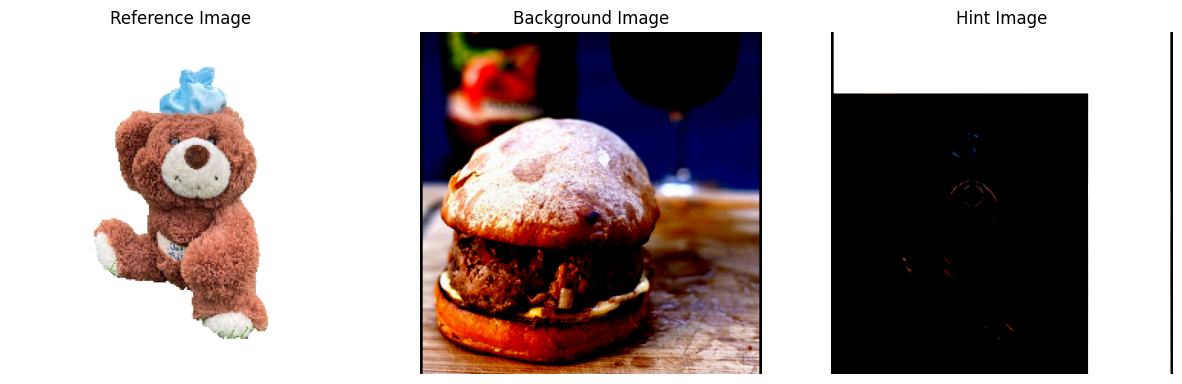

In [12]:
display_images({
    "Reference Image": result_refiners["ref"],
    "Background Image": result_refiners["jpg"],
    "Hint Image": result_refiners["hint"],
})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


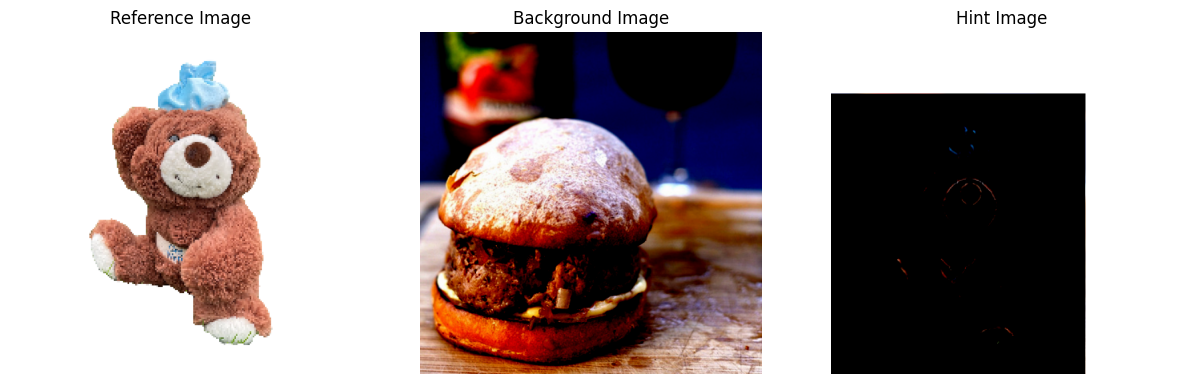

In [13]:
display_images({
    "Reference Image": result_anydoor["ref"],
    "Background Image": result_anydoor["jpg"],
    "Hint Image": result_anydoor["hint"],
})